### Total Count of Audio Files by Emotion Distribution.

#### a. A bar plot:
 Create bar chart that shows the frequency count of audio files for each emotion with different bars for each emotion. The x-axis represents emotions, and the y-axis represents the frequency count.

#### b. A pie chart: 
Create a pie chart that shows the total count of audio files for each emotion. Each emotion is represented as a slice of the pie, and the percentage of total files that each emotion contributes is displayed as labels.

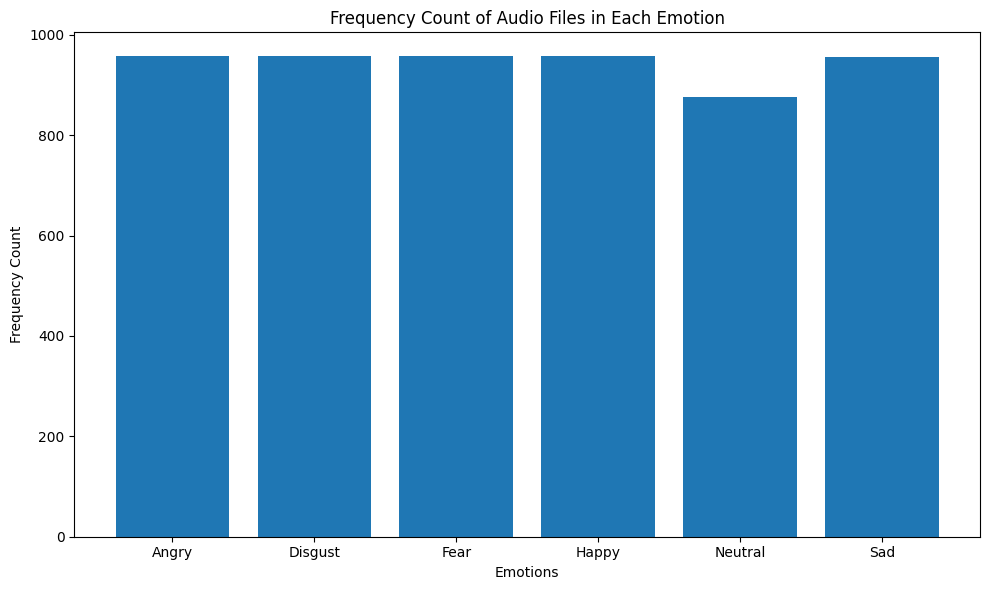

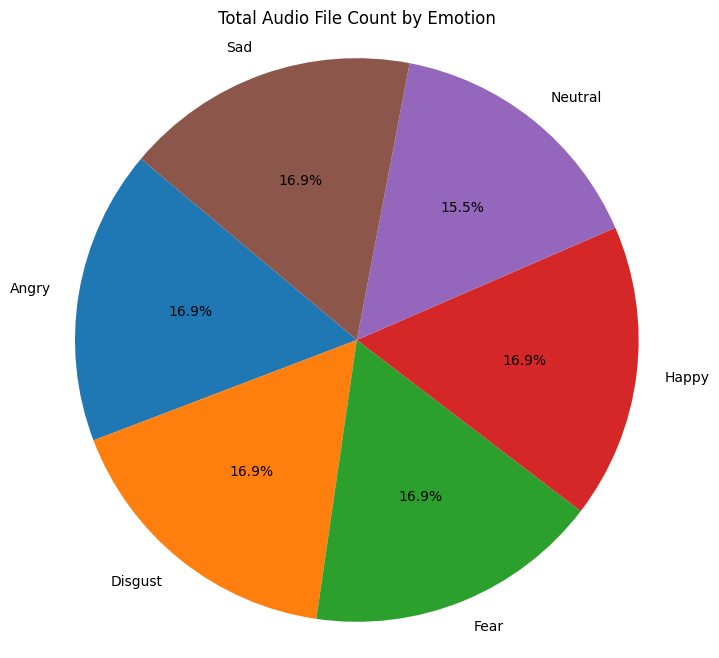

In [1]:
import os
import matplotlib.pyplot as plt

# Define the root directory where your audio files are stored
root_dir = "Audio"

# Define the emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

# Function to count audio files in each folder
def count_audio_files(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):  # Assuming your audio files are in WAV format
            count += 1
    return count

# Get the counts for each emotion
counts = {}
for emotion in emotions:
    folder_path = os.path.join(root_dir, emotion)
    if os.path.exists(folder_path):
        counts[emotion] = count_audio_files(folder_path)

# Create a bar plot showing the frequency count
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(emotions))
emotions_counts = [counts.get(emotion, 0) for emotion in emotions]

ax.bar(x, emotions_counts)
ax.set_xlabel("Emotions")
ax.set_ylabel("Frequency Count")
ax.set_title("Frequency Count of Audio Files in Each Emotion")
ax.set_xticks(x)
ax.set_xticklabels(emotions)
plt.tight_layout()

# Create a pie chart showing the total count for each emotion
total_counts = sum(emotions_counts)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(emotions_counts, labels=emotions, autopct='%1.1f%%', startangle=140)
ax.set_title("Total Audio File Count by Emotion")
plt.axis('equal')

plt.show()


### Average Audio Duration for Each Emotion

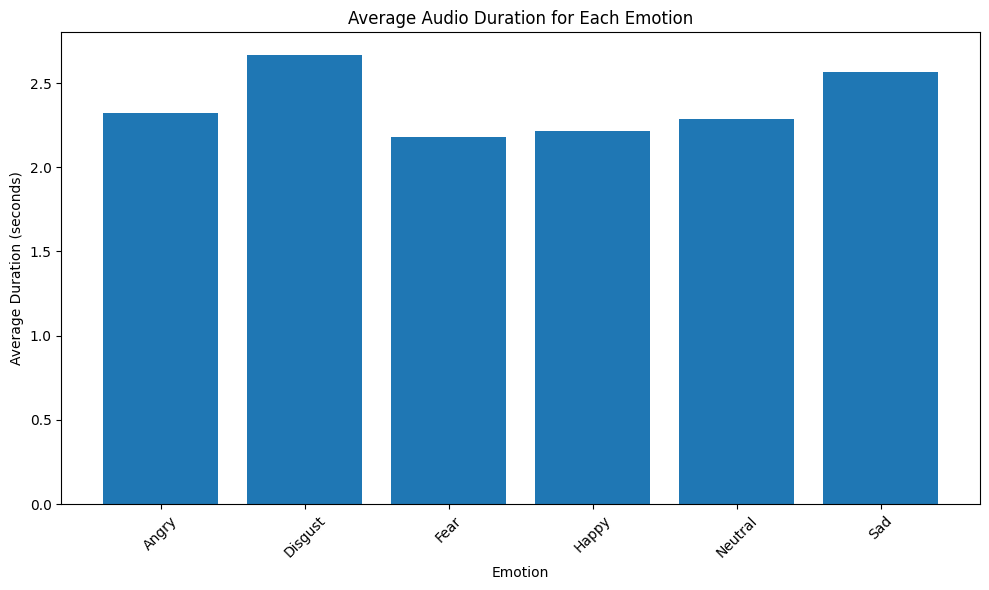

In [2]:
import os
import librosa
import matplotlib.pyplot as plt

# Define the root directory where your audio files are stored
root_dir = "Audio"

# Define the emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

# Create a dictionary to store the total duration for each emotion
emotion_durations = {emotion: 0.0 for emotion in emotions}

# Iterate through the audio files and calculate the duration
for emotion in emotions:
    folder_path = os.path.join(root_dir, emotion)
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            try:
                # Load the audio file
                y, sr = librosa.load(file_path)
                # Calculate the duration in seconds
                duration = librosa.get_duration(y=y, sr=sr)
                # Add the duration to the total for the corresponding emotion
                emotion_durations[emotion] += duration
            except Exception as e:
                print(f"Error processing file: {file_path} - {str(e)}")

# Calculate the average duration for each emotion
average_durations = [emotion_durations[emotion] / len(os.listdir(os.path.join(root_dir, emotion))) for emotion in emotions]

# Create a bar chart to visualize the average durations
plt.figure(figsize=(10, 6))
plt.bar(emotions, average_durations)
plt.xlabel('Emotion')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Audio Duration for Each Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()


### Audio Feature Visualization

#### Spectrogram:
A spectrogram is a 2D representation of audio signals that shows how the frequencies in the signal change over time.
On the y-axis, you have the frequency components (often in mel scale), and on the x-axis, you have time.
Color intensity represents the amplitude or energy at different frequencies over time.
Insights: Spectrograms can help you visualize frequency content, identify time-localized events, and distinguish different sounds. For example, you can see the harmonics of musical notes, speech patterns, and transient events in audio.
#### Chromagram:
A chromagram is a representation of the 12 different pitch classes in music (e.g., C, C#, D, D#, E, etc.).
It quantifies the presence of musical notes in an audio signal over time.
Each bin in the chromagram represents a different pitch class.
Insights: Chromagrams are useful for music analysis and can help you identify key changes, chord progressions, and melodic patterns in audio.
#### MFCC (Mel-frequency cepstral coefficients):
MFCCs are coefficients representing the short-term power spectrum of an audio signal.
They capture spectral characteristics and are widely used in speech and audio analysis, including speech recognition.
MFCCs are calculated in the mel-frequency scale to mimic the non-linear human perception of sound.
Insights: MFCCs can help identify phonemes, speaker identity, and other audio features. Changes in MFCCs can be indicative of speech content and timbral characteristics.
#### Waveform:
The waveform is a time-domain representation of the audio signal.
It shows how the amplitude of the signal varies with time.
Insights: Waveforms provide a direct view of the audio signal, showing its amplitude variations. They are useful for identifying discontinuities, transient events, and background noise.
#### Time Domain Analysis:
Time-domain analysis includes metrics like zero-crossing rate and root mean square (RMS) energy.
Zero-crossing rate measures how frequently the signal changes polarity (crosses zero) in a given time frame.
RMS energy measures the magnitude of the signal.
Insights: These metrics provide information about signal dynamics and noisiness. High zero-crossing rates may indicate noise or unvoiced speech, while RMS energy can reflect overall loudness.
#### Amplitude Histogram:
An amplitude histogram shows the distribution of amplitude values in the audio signal.
It can help identify the dynamic range and amplitude distribution of the signal.
Insights: By analyzing the amplitude histogram, you can understand how the signal's amplitude is distributed, which can be helpful for assessing signal quality and identifying clipping or saturation.

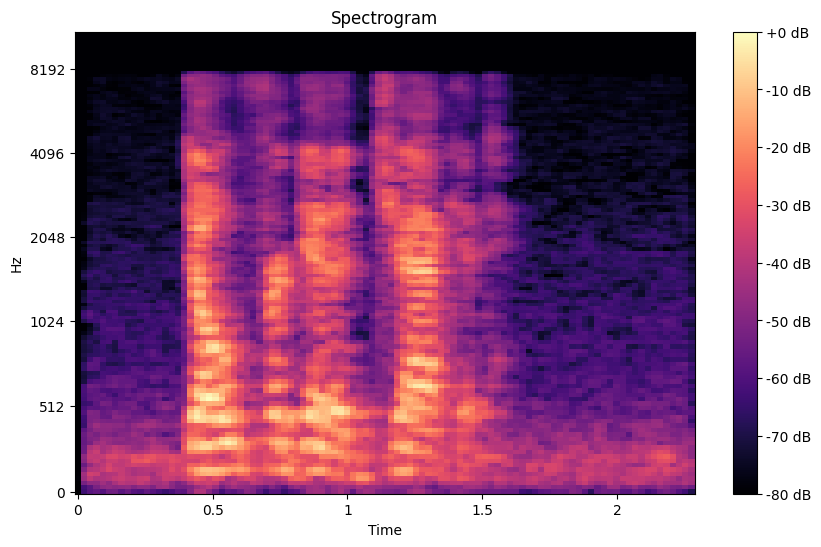

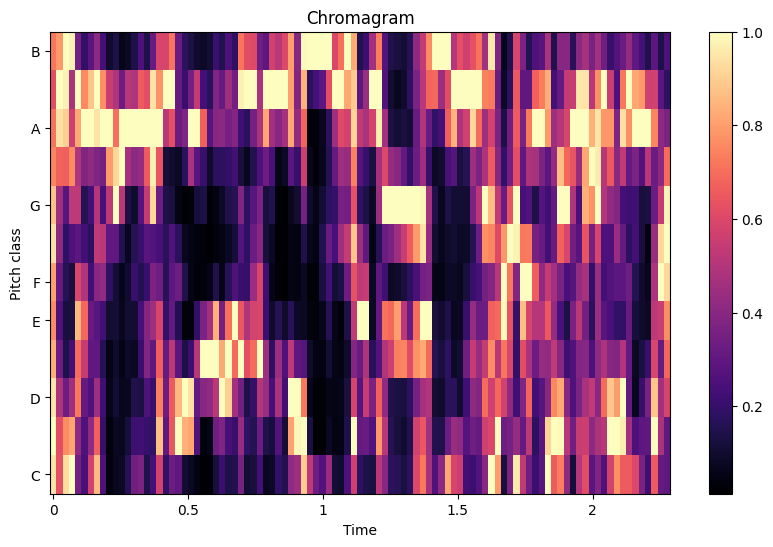

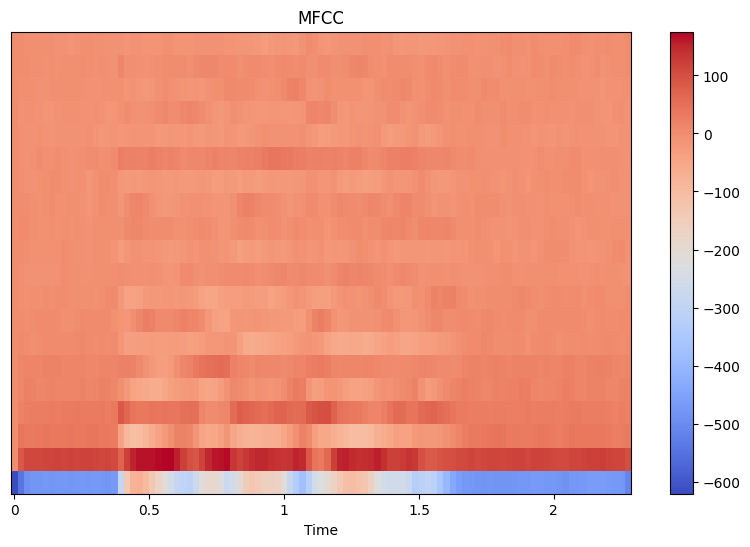

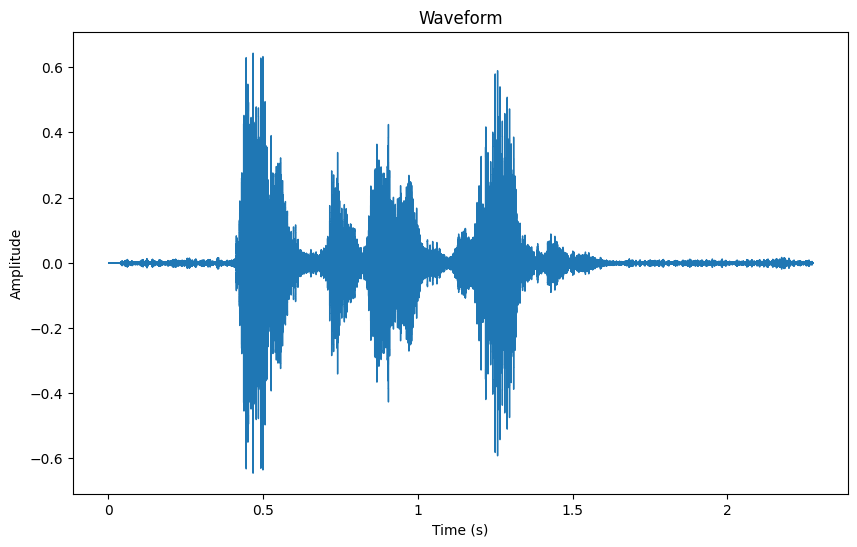

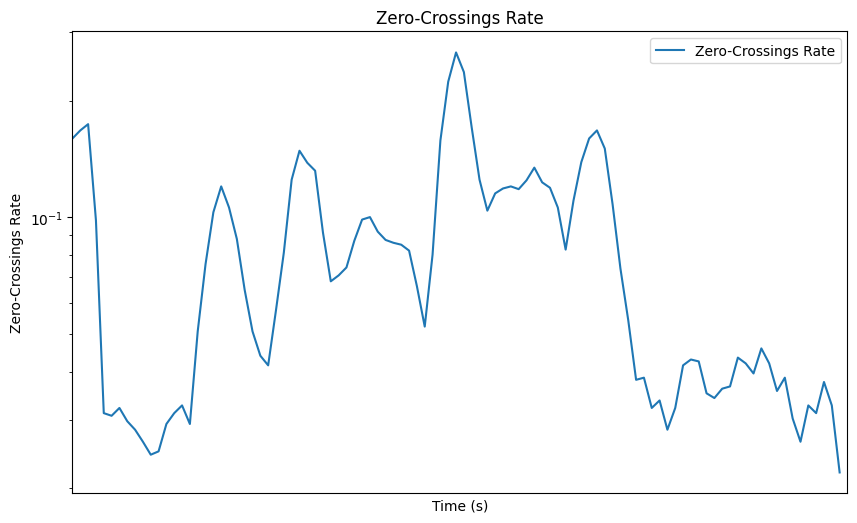

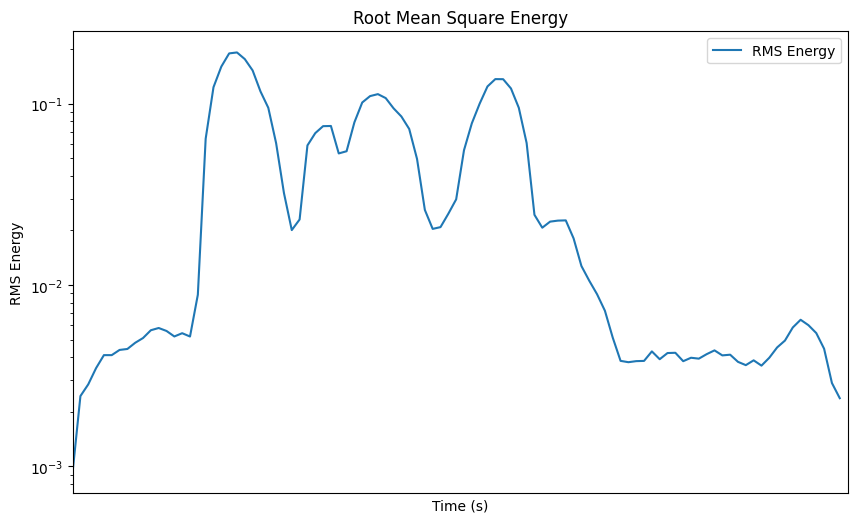

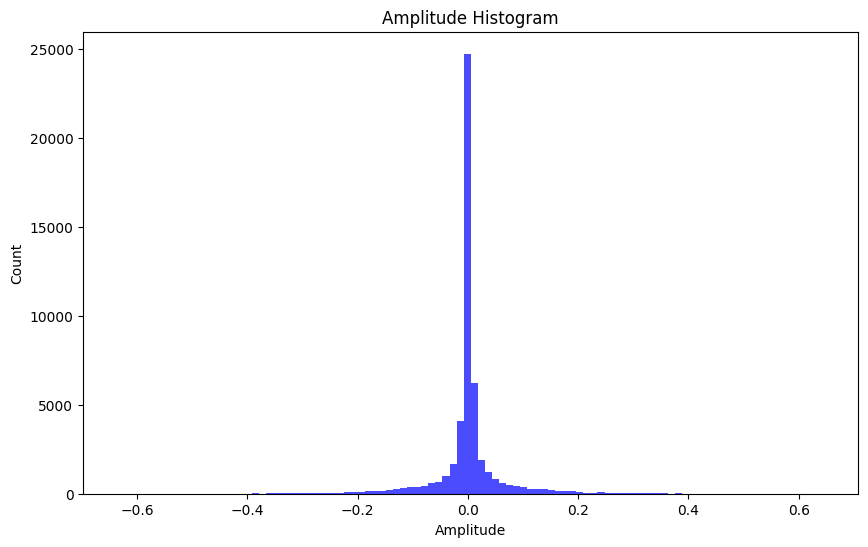

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio
y, sr = librosa.load("Audio\\Angry\\1001_DFA_ANG_XX.wav")

# Create a spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show()

# Create a chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title("Chromagram")
plt.show()

# Create an MFCC plot
mfccs = librosa.feature.mfcc(y=y, sr=sr)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.show()

# Create a waveform plot
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Calculate zero-crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize=(10, 6))
plt.semilogy(zero_crossings.T, label='Zero-Crossings Rate')
plt.xticks([])
plt.xlim([0, zero_crossings.shape[-1]])
plt.legend()
plt.title("Zero-Crossings Rate")
plt.xlabel("Time (s)")
plt.ylabel("Zero-Crossings Rate")
plt.show()

# Calculate root mean square energy
rmse = librosa.feature.rms(y=y)
plt.figure(figsize=(10, 6))
plt.semilogy(rmse.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rmse.shape[-1]])
plt.legend()
plt.title("Root Mean Square Energy")
plt.xlabel("Time (s)")
plt.ylabel("RMS Energy")
plt.show()

# Create an amplitude histogram
plt.figure(figsize=(10, 6))
plt.hist(y, bins=100, color='b', alpha=0.7)
plt.title("Amplitude Histogram")
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.show()


### Emotion Analysis Based on Audio Features.

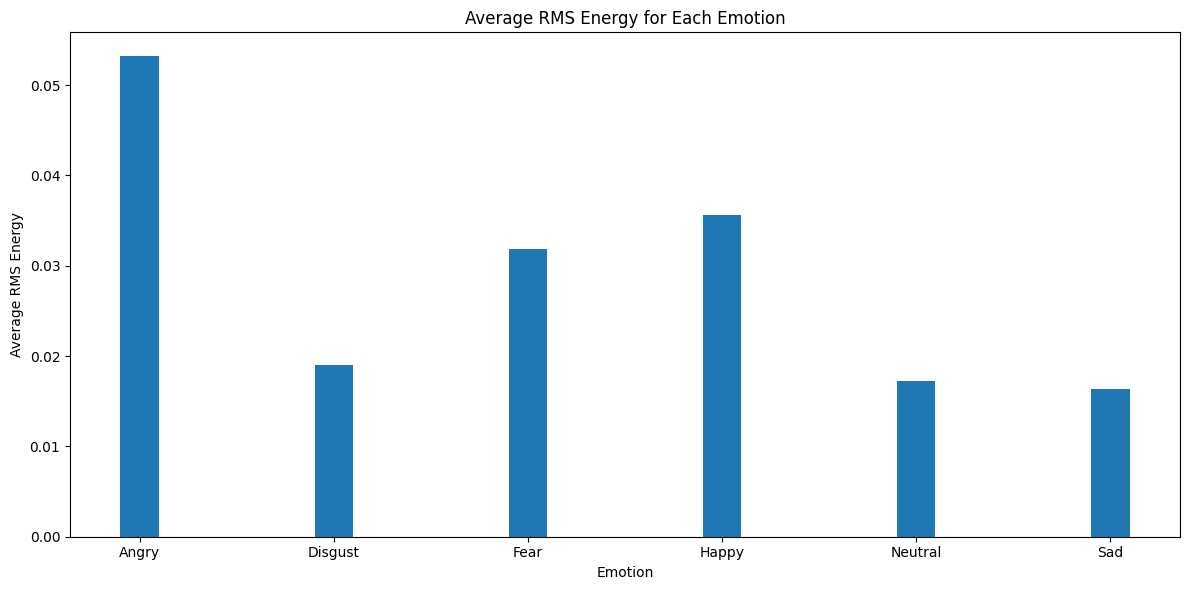

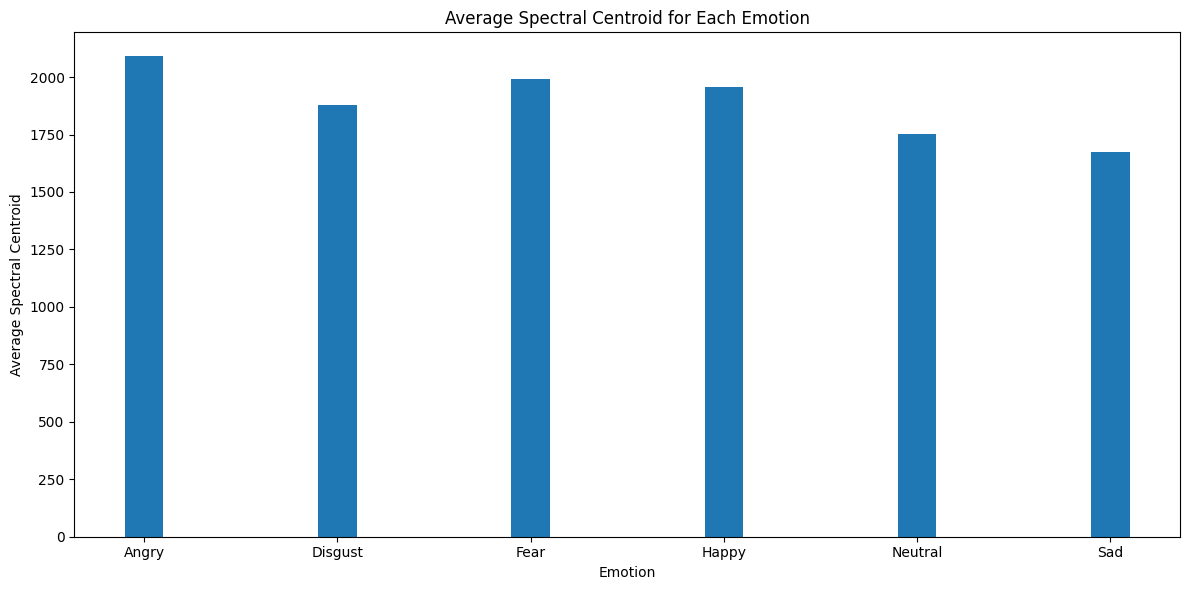

In [5]:
import os
import librosa
import matplotlib.pyplot as plt

root_dir = "Audio"
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

rms_energy_data = {}
spectral_centroid_data = {}

for emotion in emotions:
    folder_path = os.path.join(root_dir, emotion)

    # Check if the folder exists
    if not os.path.exists(folder_path):
        continue

    rms_energy_list = []
    spectral_centroid_list = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            y, sr = librosa.load(file_path)

            # Calculate RMS energy
            rms_energy = librosa.feature.rms(y=y)
            rms_energy_list.append(rms_energy.mean())

            # Calculate spectral centroid
            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
            spectral_centroid_list.append(spectral_centroid.mean())

    # Calculate the average RMS energy and spectral centroid for the emotion
    avg_rms_energy = sum(rms_energy_list) / len(rms_energy_list)
    avg_spectral_centroid = sum(spectral_centroid_list) / len(spectral_centroid_list)

    # Store the data
    rms_energy_data[emotion] = avg_rms_energy
    spectral_centroid_data[emotion] = avg_spectral_centroid

# Plot average RMS energy
plt.figure(figsize=(12, 6))
x = range(len(emotions))
bar_width = 0.2

rms_values = [rms_energy_data[emotion] for emotion in emotions]
plt.bar(x, rms_values, bar_width)

plt.xlabel("Emotion")
plt.ylabel("Average RMS Energy")
plt.title("Average RMS Energy for Each Emotion")
plt.xticks(x, emotions)
plt.tight_layout()

# Plot average spectral centroid
plt.figure(figsize=(12, 6))

centroid_values = [spectral_centroid_data[emotion] for emotion in emotions]
plt.bar(x, centroid_values, bar_width)

plt.xlabel("Emotion")
plt.ylabel("Average Spectral Centroid")
plt.title("Average Spectral Centroid for Each Emotion")
plt.xticks(x, emotions)
plt.tight_layout()

plt.show()


### Import Libraries

In [6]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from joblib import dump
from sklearn.preprocessing import LabelEncoder  # Added for label encoding

### Machine Learning

#### Train and Test Model

In [7]:
# Define the root directory where your audio files are stored
root_dir = "Audio"

# Define the emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

# Create lists to store features and labels
X = []
y = []

# Extract more audio features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path)
    except Exception as e:
        print(f"Error loading file: {file_path} - {str(e)}")
        return None
    
    if file_path.lower().endswith(".wav"):
        features = [
            np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            np.mean(librosa.feature.mfcc(y=y, sr=sr)),
            np.mean(librosa.feature.zero_crossing_rate(y)),
            np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)),
            np.mean(librosa.feature.tempogram(y=y, sr=sr))
        ]
        return features
    else:
        return None

# Extract audio features and labels
for emotion in emotions:
    folder_path = os.path.join(root_dir, emotion)
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            features = extract_features(file_path)
            if features is not None:
                X.append(features)
                y.append(emotion)

# Convert the feature and label lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Encode emotion labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a list of classifiers to try
classifiers = [
    RandomForestClassifier(n_estimators=100),  # Adjust the number of trees
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),  # Adjust hyperparameters
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    MLPClassifier(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
]

best_classifier = None
best_accuracy = 0
best_classifier_name = ""

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{classifier.__class__.__name__} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = classifier
        best_classifier_name = classifier.__class__.__name__

# Save the best model to a file
dump(best_classifier, 'best_audio_model.joblib')

print(f"The best model is: {best_classifier_name}")


RandomForestClassifier Accuracy: 0.5715547703180212
GradientBoostingClassifier Accuracy: 0.549469964664311
SVC Accuracy: 0.5503533568904594
KNeighborsClassifier Accuracy: 0.5291519434628975
DecisionTreeClassifier Accuracy: 0.446113074204947
GaussianNB Accuracy: 0.23498233215547704


c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy: 0.5662544169611308
AdaBoostClassifier Accuracy: 0.4540636042402827
QuadraticDiscriminantAnalysis Accuracy: 0.43551236749116606
XGBClassifier Accuracy: 0.5680212014134276
The best model is: RandomForestClassifier


### Confusion Matrix for each classifier

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


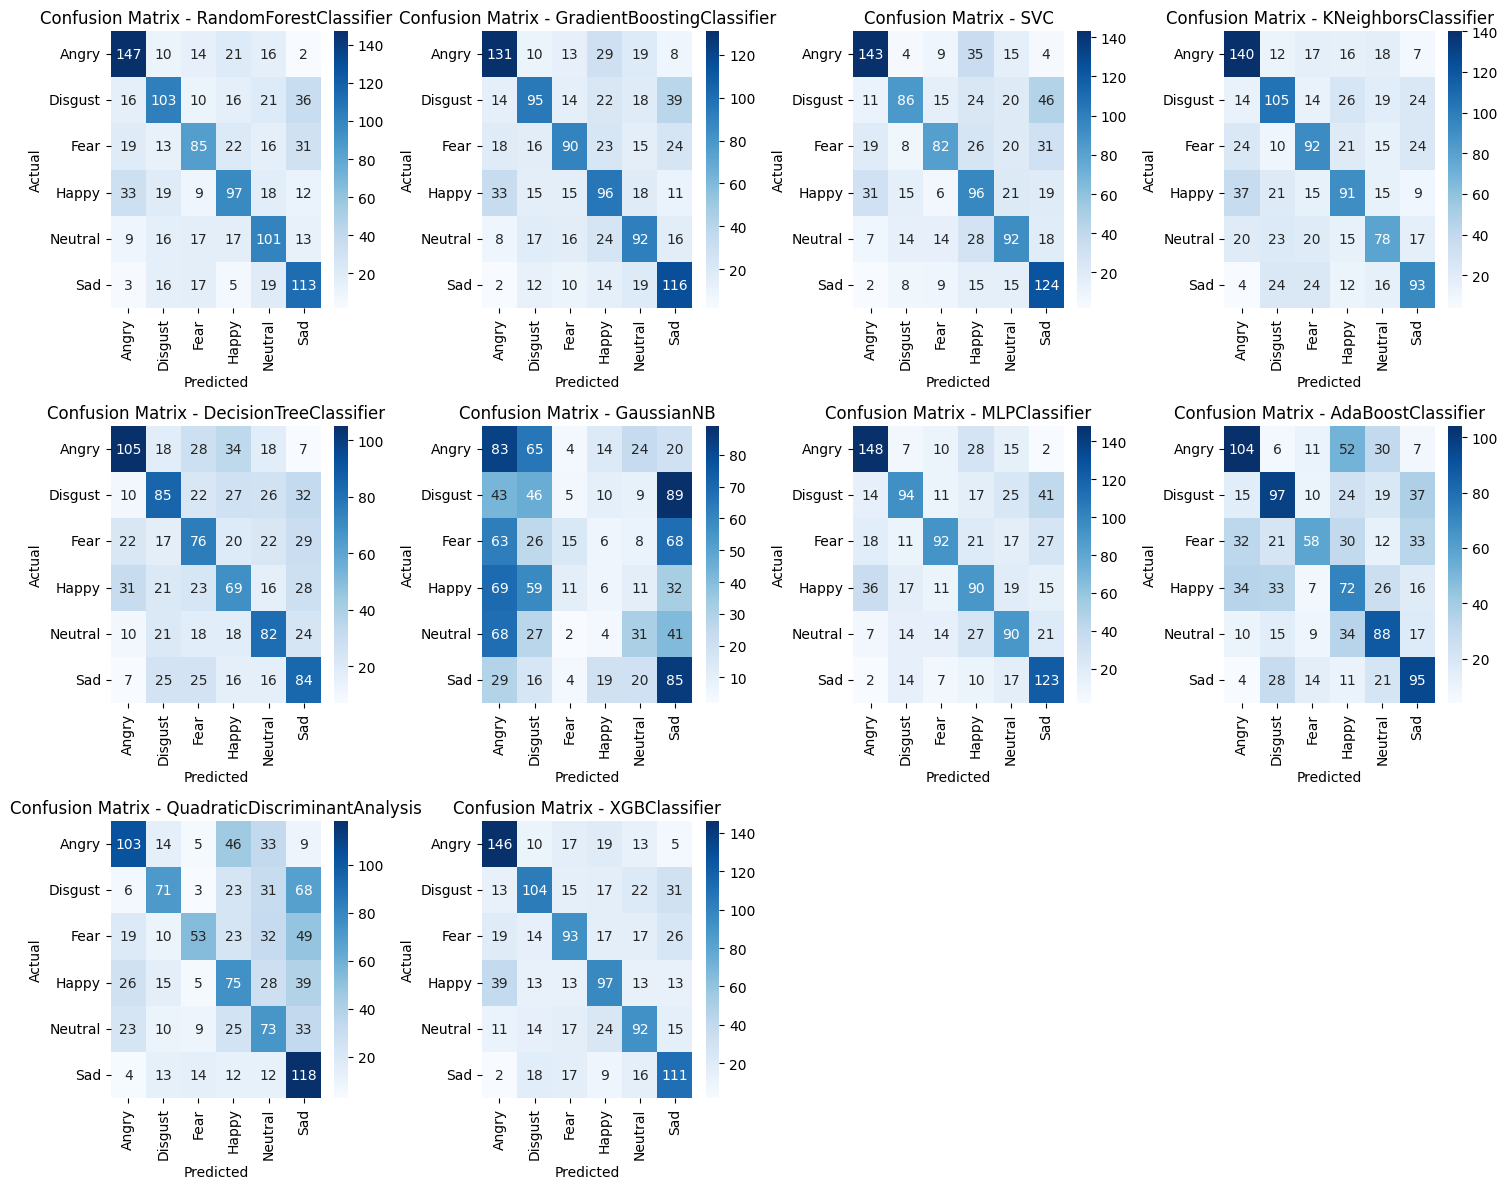

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a list of classifier names and models
classifier_names = [classifier.__class__.__name__ for classifier in classifiers]

# Initialize a list to store the confusion matrices
confusion_matrices = []

# Iterate through the classifiers and calculate the confusion matrix for each
for classifier in classifiers:
    classifier.fit(X_train, y_train)  # Fit the classifier
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Visualize the confusion matrices for each classifier
plt.figure(figsize=(15, 12))
for i, cm in enumerate(confusion_matrices):
    plt.subplot(3, 4, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier_names[i]}')
plt.tight_layout()
plt.show()

### Load Saved Model And Predict For New Audio

In [9]:
from joblib import load

# Load the best model from the file
loaded_model = load('best_audio_model.joblib')

def predict_emotions(audio_path, model, label_encoder):
    try:
        y, sr = librosa.load(audio_path)
    except Exception as e:
        print(f"Error loading audio: {str(e)}")
        return None

    # Extract audio features from the input audio
    features = extract_features(audio_path)
    if features is not None:
        # Standardize the features
        features = scaler.transform([features])
        
        # Predict the emotion probabilities using the loaded model
        emotion_probabilities = loaded_model.predict_proba(features)
        
        # Get the top 3 emotions with highest probabilities
        top_emotions_indices = (-emotion_probabilities).argsort()[0][:3]
        
        top_emotions = label_encoder.inverse_transform(top_emotions_indices)
        top_probabilities = [emotion_probabilities[0][index] for index in top_emotions_indices]
        
        return top_emotions, top_probabilities
    else:
        return None

# Provide an audio path to predict emotions
audio_path = "Test Audio Data\\JE\\Anger\\a12.wav"
predicted_emotions, probabilities = predict_emotions(audio_path, loaded_model, label_encoder)

if predicted_emotions is not None:
    print("Predicted Emotions:")
    for emotion, probability in zip(predicted_emotions, probabilities):
        print(f"{emotion}: {probability:.2f}")
else:
    print("No emotions predicted.")


Predicted Emotions:
Angry: 0.28
Disgust: 0.23
Neutral: 0.16


### Deep Learning Neural Network


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [11]:
# Define the root directory where your audio files are stored
root_dir = "Audio"

# Define the emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']
# Create lists to store features and labels
X = []
y = []

# Extract more audio features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path)
    except Exception as e:
        print(f"Error loading file: {file_path} - {str(e)}")
        return None
    
    if file_path.lower().endswith(".wav"):
        features = [
            np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            np.mean(librosa.feature.mfcc(y=y, sr=sr)),
            np.mean(librosa.feature.zero_crossing_rate(y)),
            np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)),
            np.mean(librosa.feature.tempogram(y=y, sr=sr))
        ]
        return features
    else:
        return None

# Extract audio features and labels
for emotion in emotions:
    folder_path = os.path.join(root_dir, emotion)
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            features = extract_features(file_path)
            if features is not None:
                X.append(features)
                y.append(emotion)

# Convert the feature and label lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Encode emotion labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Create a simple neural network model
model = keras.Sequential([
    layers.Input(shape=X_train.shape[1]),  # Input layer with the number of features
    layers.Dense(32, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'), 
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'), # Another hidden layer with 32 units and ReLU activation
    layers.Dense(len(emotions), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer,  # You can choose other optimizers as well
              loss='sparse_categorical_crossentropy',  # Use appropriate loss function
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model to a file
model.save('audio_nn_model.h5')


Epoch 1/20
142/142 [==============================] - 3s 8ms/step - loss: 1.6063 - accuracy: 0.3134 - val_loss: 1.4116 - val_accuracy: 0.3816
Epoch 2/20
142/142 [==============================] - 1s 6ms/step - loss: 1.3543 - accuracy: 0.4203 - val_loss: 1.3094 - val_accuracy: 0.4443
Epoch 3/20
142/142 [==============================] - 1s 7ms/step - loss: 1.2406 - accuracy: 0.4872 - val_loss: 1.3750 - val_accuracy: 0.4373
Epoch 4/20
142/142 [==============================] - 1s 7ms/step - loss: 1.1846 - accuracy: 0.5201 - val_loss: 1.2229 - val_accuracy: 0.4912
Epoch 5/20
142/142 [==============================] - 1s 7ms/step - loss: 1.1455 - accuracy: 0.5362 - val_loss: 1.2145 - val_accuracy: 0.5088
Epoch 6/20
142/142 [==============================] - 1s 7ms/step - loss: 1.1100 - accuracy: 0.5490 - val_loss: 1.1777 - val_accuracy: 0.5044
Epoch 7/20
142/142 [==============================] - 1s 6ms/step - loss: 1.0825 - accuracy: 0.5548 - val_loss: 1.1771 - val_accuracy: 0.5159
Epoch 

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 [==============================] - 0s 3ms/step


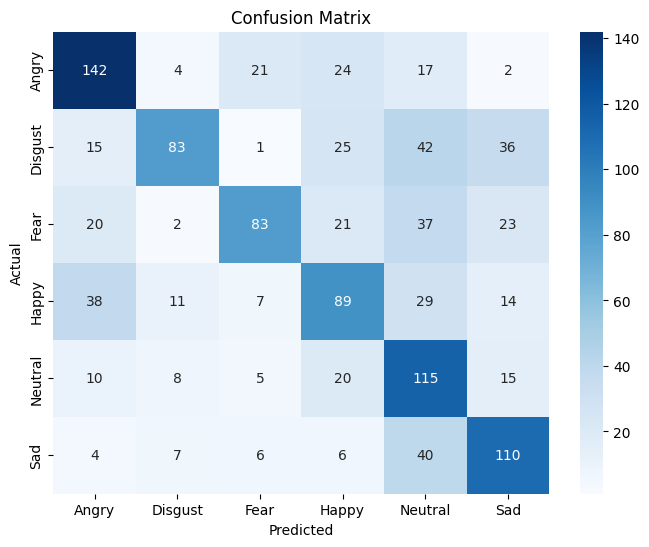

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define emotion labels (assuming the same order as in your 'emotions' list)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import librosa
import soundfile
import os,glob,pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [14]:
def extract_feature(file_name, mfcc, chroma, mel):

    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')

    if chroma:
        stft=np.abs(librosa.stft(X))

    result=np.array([])

    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0) 
        result=np.hstack((result, mfccs))

    if chroma:
        chroma-np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0) 
        result-np.hstack((result, chroma))

    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0) 
        result=np.hstack((result, mel))

    return result

In [ ]:
# Define the root directory where your audio files are stored
root_dir = "Audio"

# Define the emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']
# Create lists to store features and labels
X = []
y = []

# Extract more audio features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path)
    except Exception as e:
        print(f"Error loading file: {file_path} - {str(e)}")
        return None
    
    if file_path.lower().endswith(".wav"):
        features = [
            np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            np.mean(librosa.feature.mfcc(y=y, sr=sr)),
            np.mean(librosa.feature.zero_crossing_rate(y)),
            np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)),
            np.mean(librosa.feature.tempogram(y=y, sr=sr))
        ]
        return features
    else:
        return None

# Extract audio features and labels
for emotion in emotions:
    folder_path = os.path.join(root_dir, emotion)
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            features = extract_features(file_path)
            if features is not None:
                X.append(features)
                y.append(emotion)

# Convert the feature and label lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Encode emotion labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model=MLPClassifier(alpha=0.01,batch_size=256,epsilon=1e-08,hidden_layer_sizes=(300,),learning_rate='adaptive',max_iter=500)

In [16]:
model.fit(X_train,y_train)

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [18]:
print(accuracy)

0.5759717314487632


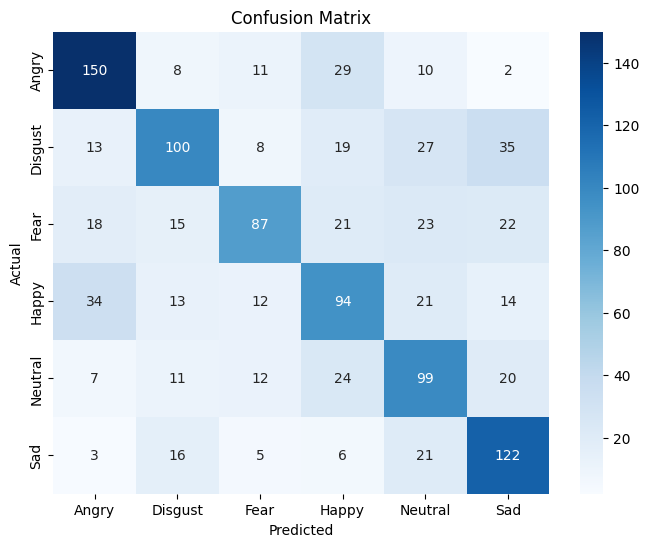

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define emotion labels (assuming the same order as in your 'emotions' list)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### TOP PERFORMING MODELS
#### 1)RandomForestClassifier(652)(58%)
#### 2)XGBClassifier(650)(57%)
#### 3)MLPClassifier(645)(56%)
#### 4)CNN(635)(55%)